Zahra Hashemi - 97243072
<br>
Dorreen Rostami - 97243034

Simulation Project 2 - phase 1

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import math
import random
import numpy as np
import itertools
import scipy.stats as st

In [7]:
remove_p = np.arange(0,1,0.1) #range of p values used throughout the solution

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<b>
</b>
<br>
اول از هر 3 مدل گراف گرافی تولید میکنیم که همبند باشد و سپس با استفاده از تابع تعریف شده، با احتمال خرابی‌های مختلف، شبیه سازی را روی 3 گراف انجام میدهیم و نمودار احتمال کاهش ناپذیر بودن را به ازای احتمال خرابی‌های مختلف ترسیم میکنیم.

<br>
</font>
</p>

In [8]:
def calculate_irreducible_p(graph):
    itr = 1000
    irreducible_prob = []
    for r_p in remove_p:
        irreducible_count = 0
        for i in range(itr):
            graph_copy = graph.copy()
            for v in range(n):
                v_p = random.random() #random number between 0 and 1 used to see if vertex will be removed
                if v_p < r_p:
                    graph_copy.remove_node(v)
            # path matrix
            irreducible = True
            for j in graph_copy.nodes:
                for k in graph_copy.nodes:
                    if (j!=k) and (not nx.has_path(graph_copy, j, k)):
                        irreducible = False
            if irreducible:
                irreducible_count += 1
        irreducible_prob.append(irreducible_count/1000)

    plt.plot(remove_p, irreducible_prob)  

    #create 95% confidence interval, degree of freedom = sample size - 1, sample mean, sample std error
    confidenceInterval = st.t.interval(alpha=0.95, df=len(irreducible_prob)-1, loc=np.mean(irreducible_prob), scale=st.sem(irreducible_prob)) 
    print('The 95% confidence interval for the population mean :',confidenceInterval)

    return irreducible_prob

The 95% confidence interval for the population mean : (0.49598882135113603, 0.8774111786488639)


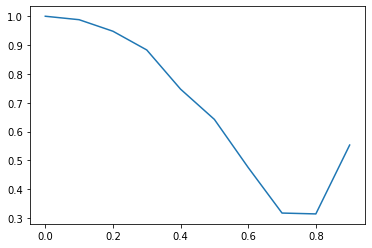

In [9]:
n = 20
p = 0.3
ER = nx.erdos_renyi_graph(n, p, seed=None, directed=False)
while not nx.is_connected(ER):
    ER = nx.erdos_renyi_graph(n, p, seed=None, directed=False)
ER_IP = calculate_irreducible_p(ER)

The 95% confidence interval for the population mean : (0.6827205900891732, 0.9320794099108268)


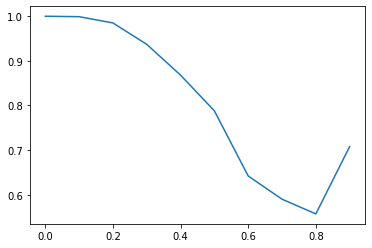

In [10]:
n = 15
m = 4
BA = nx.barabasi_albert_graph(n, m, seed=None)
while not nx.is_connected(BA):
    BA = nx.barabasi_albert_graph(n, m, seed=None)
BA_IP = calculate_irreducible_p(BA)

The 95% confidence interval for the population mean : (0.46110406609519317, 0.870495933904807)


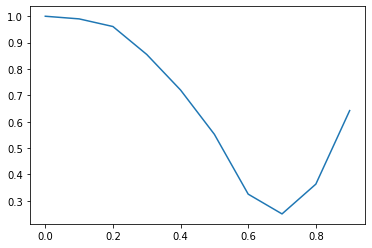

In [11]:
n = 15
k = 5
p = 0.3
WS = nx.watts_strogatz_graph(n, k, p, seed=None)
while not nx.is_connected(WS):
    WS = nx.watts_strogatz_graph(n, k, p, seed=None)
WS_IP = calculate_irreducible_p(WS)

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<br>
تابع محاسبه احتمال وصل بودن گراف (فرمول 3) به صورت زیر است:

<br>
</font>
</p>

In [12]:
def caculate_connectivity_p(graph):
    ans = []
    for r in remove_p:
        sumpki = 0
        degs = graph.degree()
        for v in range(len(degs)):
            sumpki += r**degs[v]
        res = -1 * (1 - r) * sumpki
        res = math.exp(res)
        ans.append(res)
    return ans

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<br>
برای هر سه گراف تشکیل شده در قسمت قبل، نتیجه را با جواب بدست آمده از فرمول مقایسه میکنیم:
<br>
</font>
</p>

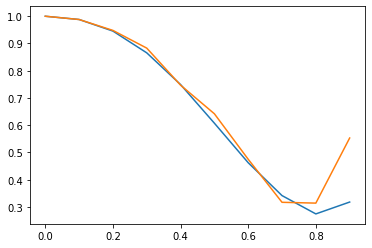

In [13]:
ER_CP = caculate_connectivity_p(ER)
plt.plot(remove_p, ER_CP)
plt.plot(remove_p, ER_IP)

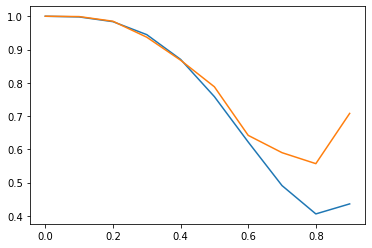

In [14]:
BA_CP = caculate_connectivity_p(BA)
plt.plot(remove_p, BA_CP)
plt.plot(remove_p, BA_IP)

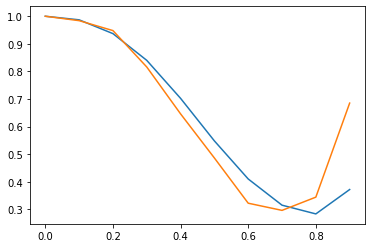

In [150]:
WS_CP = caculate_connectivity_p(WS)
plt.plot(remove_p, WS_CP)
plt.plot(remove_p, WS_IP)

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<br>
تابع محاسبه تاب آوری (فرمول 6) به صورت زیر است:

<br>
</font>
</p>

In [155]:
def calculate_resilience(graph):
    n = len(graph.nodes)
    C = [0 for _ in range(n + 1)]

    #note than C[n] = C[n-1] = C[0] = 0
    #find all connected subgraphs with 1 <= V <= n - 2
    #then remove them from G and check if G stays connected
    for i in range(1, n - 1):
        for SG in (graph.subgraph(selected_nodes) for selected_nodes in itertools.combinations(graph, i)):
            if nx.is_connected(SG):
                GC = graph.copy()
                GC.remove_nodes_from(SG.nodes)
                if not nx.is_connected(GC):
                    C[i] += 1

    res_G = []
    for r in range(len(remove_p)):
        phi_G = 0
        for i in range(0, n + 1):
            phi_G += C[i] * remove_p[r]**i * (1-remove_p[r])**(n-i)
        res_G.append(1 - phi_G)
    
    return res_G

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<br>
نتایج حاصل از قسمت اول را با جواب حاصل از تابع تاب آوری مقایسه میکنیم:

<br>
</font>
</p>

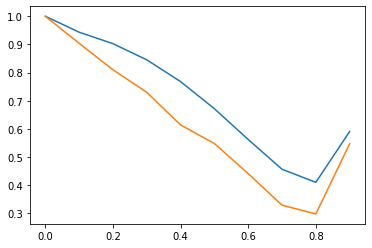

In [160]:
ER_RG = calculate_resilience(ER)
plt.plot(remove_p, ER_RG)
plt.plot(remove_p, ER_IP)

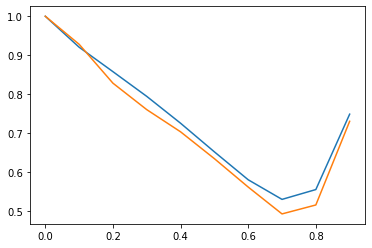

In [158]:
BA_RG = calculate_resilience(BA)
plt.plot(remove_p, BA_RG)
plt.plot(remove_p, BA_IP)

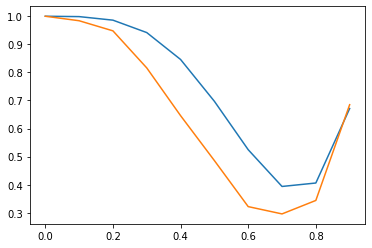

In [159]:
WS_RG = calculate_resilience(WS)
plt.plot(remove_p, WS_RG)
plt.plot(remove_p, WS_IP)